In [1]:
ARCHITECTURE = 'ResNet'
EXPERIMENT_TYPE = 'fixed-eps'
ITERATIONS = 2

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

#from helperfiles.helpers import *
import helperfiles.experiment as experiment




  0%|          | 0/2 [00:00<?, ?it/s]

no model to delete


74/74 [==============================] - 12s 158ms/step - loss: 2.1210 - accuracy: 0.2979



0it [00:00, ?it/s]

current pruning ratio is0.0, current iteration is 0
Epoch 1/150


74/74 [==============================] - 17s 223ms/step - loss: 1.7038 - accuracy: 0.4294 - val_loss: 2.5375 - val_accuracy: 0.1355 - lr: 0.0010
Epoch 2/150
74/74 [==============================] - 12s 164ms/step - loss: 1.4551 - accuracy: 0.5128 - val_loss: 2.3220 - val_accuracy: 0.1371 - lr: 0.0010
Epoch 3/150
74/74 [==============================] - 12s 164ms/step - loss: 1.2726 - accuracy: 0.5823 - val_loss: 2.3603 - val_accuracy: 0.2652 - lr: 0.0010
Epoch 4/150
74/74 [==============================] - 12s 164ms/step - loss: 1.1422 - accuracy: 0.6223 - val_loss: 1.6544 - val_accuracy: 0.4395 - lr: 0.0010
Epoch 5/150
74/74 [==============================] - 12s 165ms/step - loss: 1.0596 - accuracy: 0.6502 - val_loss: 1.6346 - val_accuracy: 0.4731 - lr: 0.0010
Epoch 6/150
74/74 [==============================] - 13s 173ms/step - loss: 0.9595 - accuracy: 0.6866 - val_loss: 2.5994 - val_accuracy: 0.3271 - lr: 0.0010
Epoch 7/150
74/74 [==============================] - 13s 170ms/step - 

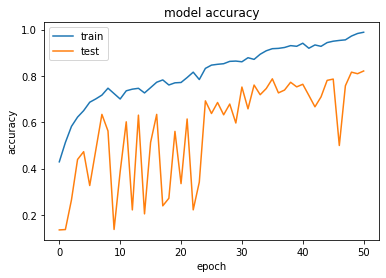

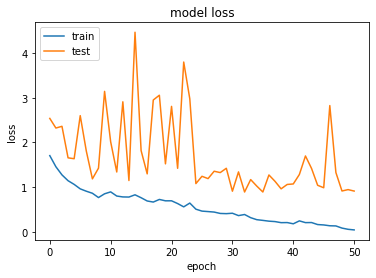

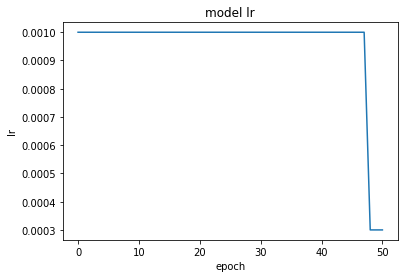

starting bb0 11:12:45
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


bb0 batch 0 11:12:45
bb0 batch 1 11:19:12
bb0 batch 2 11:25:08
bb0 batch 3 11:31:07
bb0 batch 4 11:37:07
bb0 batch 5 11:43:07


In [ ]:
experiment.run(
    
    structure='unstructured', 
    method='magnitude', 
    scope='local', 
    iterations=ITERATIONS,
    architecture = ARCHITECTURE,
    experiment_type = EXPERIMENT_TYPE,
)

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only allocate 1GB * 2 of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024 * 9.5)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)


In [ ]:

tf.get_logger().setLevel('ERROR')

In [ ]:
run_experiment(
    structure='unstructured', 
    method='random', 
    scope='local', 
    iterations=ITERATIONS
)

In [ ]:
run_experiment(
    structure='unstructured', 
    method='magnitude', 
    scope='local', 
    iterations=ITERATIONS
)

In [ ]:
run_experiment(
    structure='unstructured', 
    method='magnitude', 
    scope='global', 
    iterations=ITERATIONS
)

In [ ]:
run_experiment(
    structure='structured', 
    method='random', 
    scope='local', 
    iterations=ITERATIONS
)

In [ ]:
run_experiment(
    structure='structured', 
    method='magnitude', 
    scope='local', 
    iterations=ITERATIONS
)

In [ ]:
run_experiment(
    structure='structured', 
    method='magnitude', 
    scope='global', 
    iterations=ITERATIONS
)

# newer

In [ ]:
model = initialize_base_model('',1, lr=1e-3)
hist = train_model(model)
plot_hist(hist)

fmodel = fb.models.TensorFlowModel(model, bounds=(0,1))
attack = fb.attacks.L2CarliniWagnerAttack(
    binary_search_steps = 9,
    steps= 5000,
    stepsize = .01,
    confidence = 0,
    initial_const = 1000000,
    abort_early = True,
)

adversarials, _, batch_success = attack(
        fmodel,
        attack_images[:3],
        attack_labels[:3],
        epsilons=None
    )
l2_adv = adversarials[0]
l2_pert = (attack_images[0]-l2_adv)

fmodel = fb.models.TensorFlowModel(model, bounds=(0,1))
init_attack = fb.attacks.DatasetAttack()
BATCHSIZE = 64
batches = [
    (attack_images[:BATCHSIZE], attack_labels[:BATCHSIZE]), 
    (attack_images[BATCHSIZE:2*BATCHSIZE], attack_labels[BATCHSIZE:2*BATCHSIZE]),
    (attack_images[2*BATCHSIZE:3*BATCHSIZE], attack_labels[2*BATCHSIZE:3*BATCHSIZE]), 
    (attack_images[3*BATCHSIZE:4*BATCHSIZE], attack_labels[3*BATCHSIZE:4*BATCHSIZE])
]

init_attack = fb.attacks.DatasetAttack()

init_attack.feed(fmodel, batches[0][0])   # feed 1st batch of inputs
init_attack.feed(fmodel, batches[1][0])   # feed 2nd batch of inputs
init_attack.feed(fmodel, batches[2][0])   # feed 1st batch of inputs
init_attack.feed(fmodel, batches[3][0])   # feed 2nd batch of inputs
attack = fb.attacks.L0BrendelBethgeAttack(binary_search_steps=30, steps=500,lr_num_decay=30, lr=1e7, init_attack=init_attack)

adversarials, _, batch_success = attack(
    fmodel,
    attack_images[:3],
    criterion=fb.criteria.Misclassification(attack_labels[:3]),
    epsilons=[None]
)
l0_adv = adversarials[0][0]
l0_pert = (attack_images[0]-l0_adv)



fmodel = fb.models.TensorFlowModel(model, bounds=(0,1))
attack = fb.attacks.LinfProjectedGradientDescentAttack()
res = [[],[],[],[],[],[]]
strengths = [0.125,0.25,0.5,1,2,4]


adversarials, _, success = attack(
    fmodel,
    attack_images[:3],
    attack_labels[:3],
    epsilons=8/255
)
l_inf_adv = adversarials[0]

l_inf_pert = (attack_images[0]-l_inf_adv)

advs = {
    'l0':{
        'original':attack_images[0],
        'adversarial':l0_adv,
        'perturbation':l0_pert,
        'adversarial_class':5,
    },
    'l2':{
        'original':attack_images[0],
        'adversarial':l2_adv,
        'perturbation':l2_pert,
        'adversarial_class':8
    },
    'linf':{
        'original':attack_images[0],
        'adversarial':l_inf_adv,
        'perturbation':l_inf_pert,
        'adversarial_class':8
    },
}

import pickle
filename = 'advs'
outfile = open(filename,'wb')
pickle.dump(advs,outfile)
outfile.close()